Data Exploration

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the datasets
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

# Display the first few rows of the training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


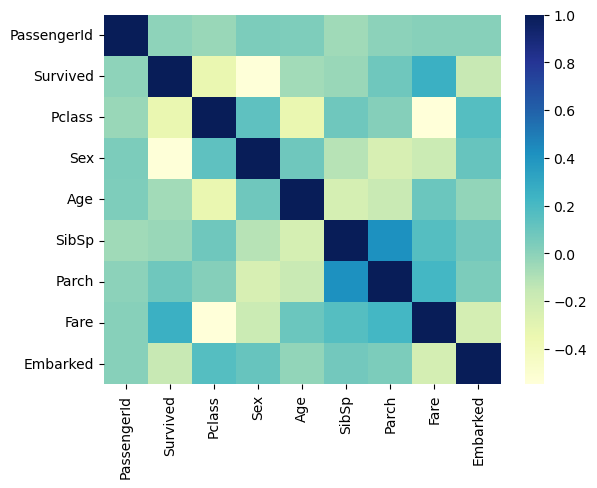

In [30]:
# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=['number']).columns
train_data_numeric = train_data[numeric_cols]

# Plot the heatmap
sns.heatmap(train_data_numeric.corr(), cmap='YlGnBu')
plt.show()

Data Reprocessing

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into training and validation
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(train_data, train_data[['Survived', 'Pclass', 'Sex']]):
    train_set = train_data.loc[train_indices]
    train_test_set = train_data.loc[test_indices]

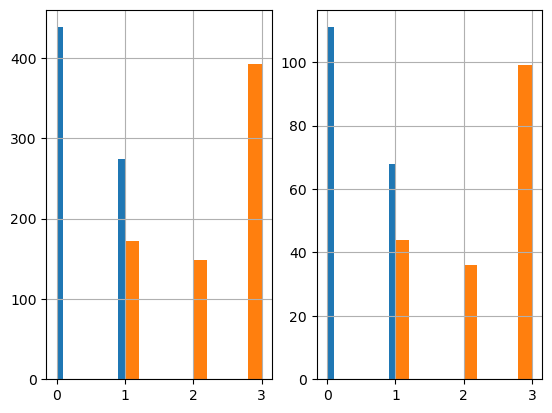

In [13]:
plt.subplot (1,2,1)
train_set [ 'Survived'].hist()
train_set ['Pclass'].hist()

plt.subplot (1,2,2)
train_test_set ['Survived'].hist()
train_test_set ['Pclass'].hist()
plt.show()